# Chapter 22: Dealing with Missing and Duplicated Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Sample nonlinear data

In [4]:

# 1. Sample nonlinear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 1.5 * X.flatten() + 2 * X.flatten()**2 + np.random.randn(100)

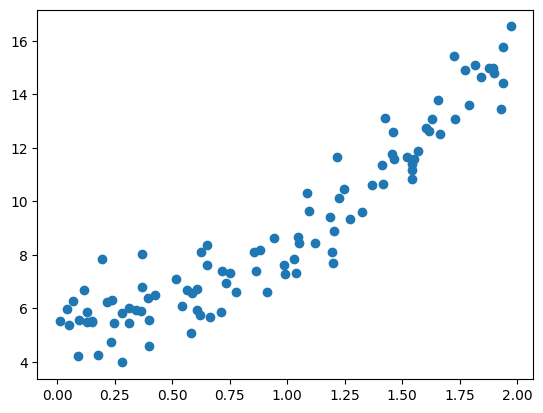

In [3]:
plt.scatter(X,y)

2. Split train/test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

3. Build Pipeline

In [6]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaer', StandardScaler()),
    ('lin_reg', LinearRegression())

])

4. Fit

In [8]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaer', StandardScaler()), ('lin_reg', LinearRegression())])

5. Predict

In [9]:
y_pred = pipeline.predict(X_test)

6. evaluate

In [10]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 0.5967807884777878
MAE: 0.624727508082786
R^2: 0.9385182413262753


7. Plot

In [13]:
X_plot = np.linspace(0,2,200).reshape(-1,1)
X_plot

array([[0.        ],
       [0.01005025],
       [0.0201005 ],
       [0.03015075],
       [0.04020101],
       [0.05025126],
       [0.06030151],
       [0.07035176],
       [0.08040201],
       [0.09045226],
       [0.10050251],
       [0.11055276],
       [0.12060302],
       [0.13065327],
       [0.14070352],
       [0.15075377],
       [0.16080402],
       [0.17085427],
       [0.18090452],
       [0.19095477],
       [0.20100503],
       [0.21105528],
       [0.22110553],
       [0.23115578],
       [0.24120603],
       [0.25125628],
       [0.26130653],
       [0.27135678],
       [0.28140704],
       [0.29145729],
       [0.30150754],
       [0.31155779],
       [0.32160804],
       [0.33165829],
       [0.34170854],
       [0.35175879],
       [0.36180905],
       [0.3718593 ],
       [0.38190955],
       [0.3919598 ],
       [0.40201005],
       [0.4120603 ],
       [0.42211055],
       [0.4321608 ],
       [0.44221106],
       [0.45226131],
       [0.46231156],
       [0.472

In [14]:
y_plot = pipeline.predict(X_plot)

Text(0.5, 1.0, 'Polynomial Regression with Pipeline')

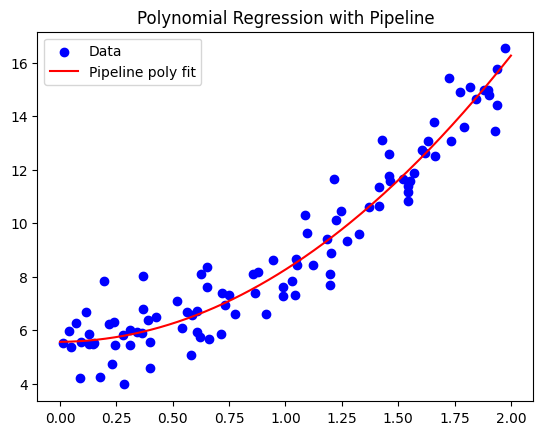

In [17]:
plt.scatter(X,y, color = 'blue', label = 'Data')
plt.plot(X_plot, y_plot, color = 'red', label = 'Pipeline poly fit')
plt.legend()
plt.title('Polynomial Regression with Pipeline')

In [ ]:
import pandas as pd
import numpy as np

url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
np.random.seed(88)

In [ ]:
X1 = 2* np.random.rand(100,1)
X2 = 4* np.random.rand(100,1)
X1[:10], X2[:10]

(array([[1.2951021 ],
        [1.01429938],
        [1.05668276],
        [1.79257041],
        [1.39998238],
        [1.4285942 ],
        [1.43467676],
        [0.44563892],
        [0.35030905],
        [0.91368298]]),
 array([[0.47458142],
        [1.36251663],
        [1.45607604],
        [2.61894244],
        [3.74400973],
        [0.79789916],
        [2.49520422],
        [0.62868834],
        [0.33024501],
        [2.77238856]]))

In [ ]:
y = 4 + 3*X1.flatten() + 2*X2.flatten() + np.random.randn(100)
y.shape, y[:10]

((100,),
 array([ 7.96819206,  8.78706359, 11.14861878, 15.45345995, 15.67876163,
         9.26130372, 12.94552187,  5.17291977,  5.51503307, 11.32629116]))

In [ ]:
X = np.hstack((X1, X2))
X.shape, X[:10]

((100, 2),
 array([[1.2951021 , 0.47458142],
        [1.01429938, 1.36251663],
        [1.05668276, 1.45607604],
        [1.79257041, 2.61894244],
        [1.39998238, 3.74400973],
        [1.4285942 , 0.79789916],
        [1.43467676, 2.49520422],
        [0.44563892, 0.62868834],
        [0.35030905, 0.33024501],
        [0.91368298, 2.77238856]]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([3.19612011, 2.13774125]), np.float64(3.4942334482463604))

In [ ]:
print(f'Coeeficients: {model.coef_}, Intercept:{model.intercept_}')

Coeeficients: [3.19612011 2.13774125], Intercept:3.4942334482463604


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test[:10], y_pred[:10]

(array([13.41484503,  9.19650075, 14.99289872,  9.7560766 , 11.14861878,
         9.08779083, 13.38502765, 11.15221532, 13.33140998,  9.27905485]),
 array([11.31795125,  9.02985233, 15.72938332, 10.21669851,  9.98423229,
         9.91071665, 13.40095801, 10.96995558, 13.80339603, 10.02850132]))

In [ ]:
np.hstack((y_test.reshape(-1,1), y_pred.reshape(-1,1)))

array([[13.41484503, 11.31795125],
       [ 9.19650075,  9.02985233],
       [14.99289872, 15.72938332],
       [ 9.7560766 , 10.21669851],
       [11.14861878,  9.98423229],
       [ 9.08779083,  9.91071665],
       [13.38502765, 13.40095801],
       [11.15221532, 10.96995558],
       [13.33140998, 13.80339603],
       [ 9.27905485, 10.02850132],
       [ 8.85802367, 11.3026328 ],
       [10.54974185, 10.14043203],
       [10.7604947 , 10.8080099 ],
       [10.24173354, 13.18105812],
       [10.10669095,  9.55844378],
       [11.60093617, 12.59584504],
       [ 9.80522683,  8.87156396],
       [17.59215661, 17.31475577],
       [11.4604665 ,  9.83041554],
       [17.27613026, 17.77632973]])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, r2)

1.398106512140197 0.8796406286691724 0.7798000940693975


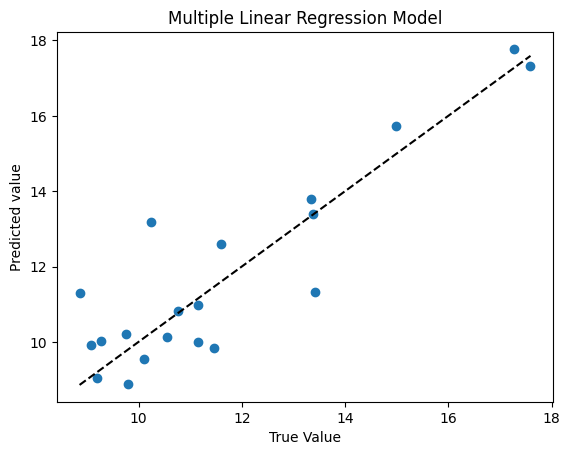

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted value')
plt.title('Multiple Linear Regression Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.show()

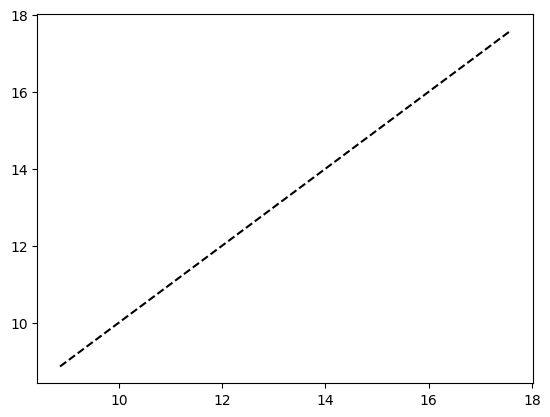

In [ ]:
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

In [ ]:
[min(y_test), max(y_test)]

[np.float64(8.858023665208883), np.float64(17.59215661284938)]

Try a polynomial regression example

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X.flatten() + 5 *X.flatten()**2+ np.random.randn(100)

In [ ]:
y.shape

(100,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape, X_test_poly.shape

((80, 2), (20, 2))

In [ ]:
X_train[:5]

array([[1.52527751],
       [1.05538554],
       [0.77871553],
       [0.76495706],
       [0.66071891]])

In [ ]:
X_train_poly[:5]

array([[1.52527751, 2.32647148],
       [1.05538554, 1.11383863],
       [0.77871553, 0.60639787],
       [0.76495706, 0.58515931],
       [0.66071891, 0.43654947]])

In [ ]:
model_p = LinearRegression()
model_p.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
y_pred = model_p.predict(X_test_poly)

In [ ]:
y_test[:10].shape

(10,)

In [ ]:
np.hstack((y_test[:10], y_pred[:10]))

array([ 3.81162832,  8.95752879,  7.24708026,  4.59596936, 24.86914224,
       26.95272966,  5.03706886, 19.78554097,  4.25789912,  3.04888332,
        4.3564589 , 10.53325908,  7.46349404,  4.24336992, 24.39183738,
       26.61906523,  4.99849074, 20.58103524,  4.84521726,  4.78324663])

In [ ]:
np.hstack((y_test[:10], y_pred[:10])).shape

(20,)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 0.7186861392232653
MAE: 0.64373168980508
R^2: 0.9882888238238504


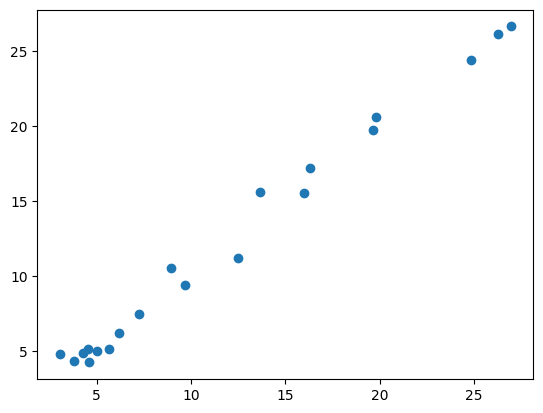

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot.shape, X_plot[:100]

((100, 1),
 array([[0.        ],
        [0.02020202],
        [0.04040404],
        [0.06060606],
        [0.08080808],
        [0.1010101 ],
        [0.12121212],
        [0.14141414],
        [0.16161616],
        [0.18181818],
        [0.2020202 ],
        [0.22222222],
        [0.24242424],
        [0.26262626],
        [0.28282828],
        [0.3030303 ],
        [0.32323232],
        [0.34343434],
        [0.36363636],
        [0.38383838],
        [0.4040404 ],
        [0.42424242],
        [0.44444444],
        [0.46464646],
        [0.48484848],
        [0.50505051],
        [0.52525253],
        [0.54545455],
        [0.56565657],
        [0.58585859],
        [0.60606061],
        [0.62626263],
        [0.64646465],
        [0.66666667],
        [0.68686869],
        [0.70707071],
        [0.72727273],
        [0.74747475],
        [0.76767677],
        [0.78787879],
        [0.80808081],
        [0.82828283],
        [0.84848485],
        [0.86868687],
        [0.88888889],

In [ ]:
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)


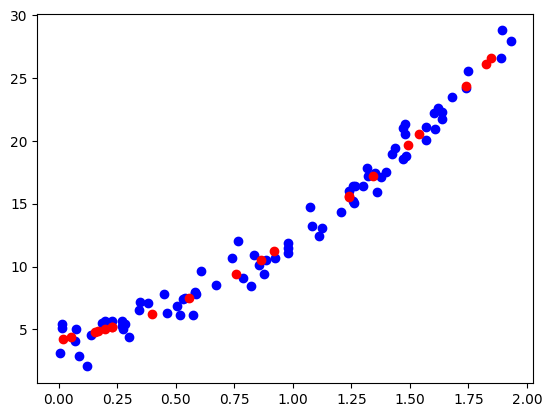

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.scatter(X_test, y_pred, color='red', label='Polynomial Fit')

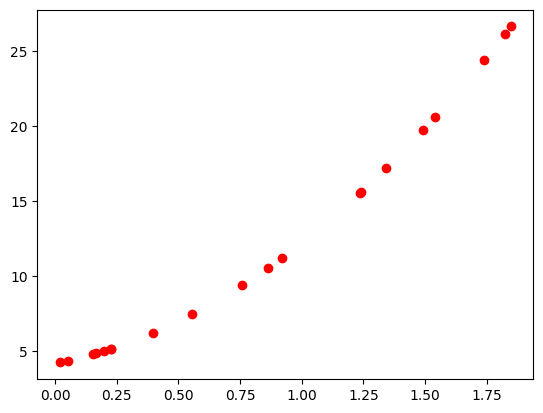

In [ ]:
plt.scatter(X_test, y_pred, color='red', label='Polynomial Fit')

In [ ]:
X_test.shape, y_pred.shape

((20, 1), (20,))

In [ ]:
X_plot.shape, y_plot.shape

((100, 1), (100,))

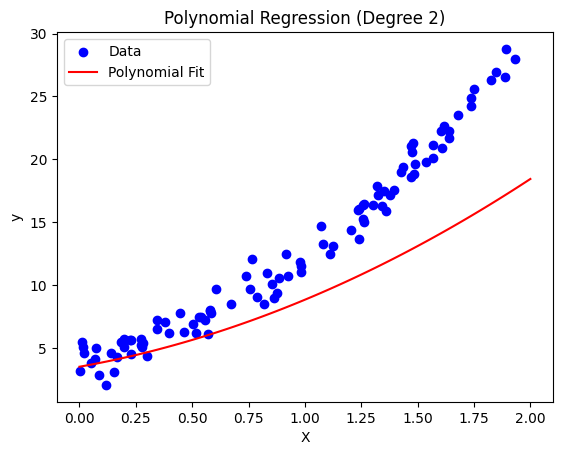

In [ ]:
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [ ]:
y_pred.shape, y_test.shape

((20, 100), (20, 100))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data for demo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)       # 100 data points between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # True relation: y = 4 + 3x + noise

# Add a bias column (for manual implementation)
X_b = np.c_[np.ones((100, 1)), X]    # shape: (100, 2)

# Initialize weights (w0 = bias, w1 = slope)
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

# Gradient Descent Loop
for iteration in range(n_iterations):
    y_pred = X_b.dot(theta)                        # Prediction
    error = y_pred - y                             # Error
    gradients = (2/m) * X_b.T.dot(error)           # Gradient of loss w.r.t. theta
    theta -= learning_rate * gradients             # Update step

# Final learned weights
print(f"Learned parameters: intercept = {theta[0][0]:.2f}, slope = {theta[1][0]:.2f}")

Learned parameters: intercept = 4.22, slope = 2.97


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(88)
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
w = np.random.randn(1)
w

array([0.88706165])

In [ ]:
b = np.random.randn(1)

In [ ]:
learning_rate = 0.05
epochs = 1000
m = X.shape[0]
X.shape, y.shape

((100, 1), (100, 1))

In [ ]:
X[0:10], y[0:10]

(array([[1.2951021 ],
        [1.01429938],
        [1.05668276],
        [1.79257041],
        [1.39998238],
        [1.4285942 ],
        [1.43467676],
        [0.44563892],
        [0.35030905],
        [0.91368298]]),
 array([[7.54880734],
        [6.23769789],
        [8.58475272],
        [8.13447504],
        [7.14235296],
        [8.66769806],
        [8.54669248],
        [4.81232796],
        [4.39744791],
        [5.18573424]]))

In [ ]:
(w*X).shape

(100, 1)

In [ ]:
 y_pred = w*X + b
 y_pred.shape

(100, 1)

In [ ]:
error = y_pred - y
error.shape

(100, 1)

In [ ]:
(error * X).shape

(100, 1)

In [ ]:
for epoch in range(epochs):
  y_pred = w*X + b
  error = y_pred - y

  dw = (1/m)*np.sum(error * X)
  db = (1/m)*np.sum(error)

  w = w - learning_rate*dw
  b = b - learning_rate*db


In [ ]:
w

array([3.2761])

In [ ]:
b

array([3.60846497])

In [ ]:
print(f"Learned parameters: intercept = {b[0]:.2f}, slope = {w[0]:.2f}")

Learned parameters: intercept = 3.61, slope = 3.28


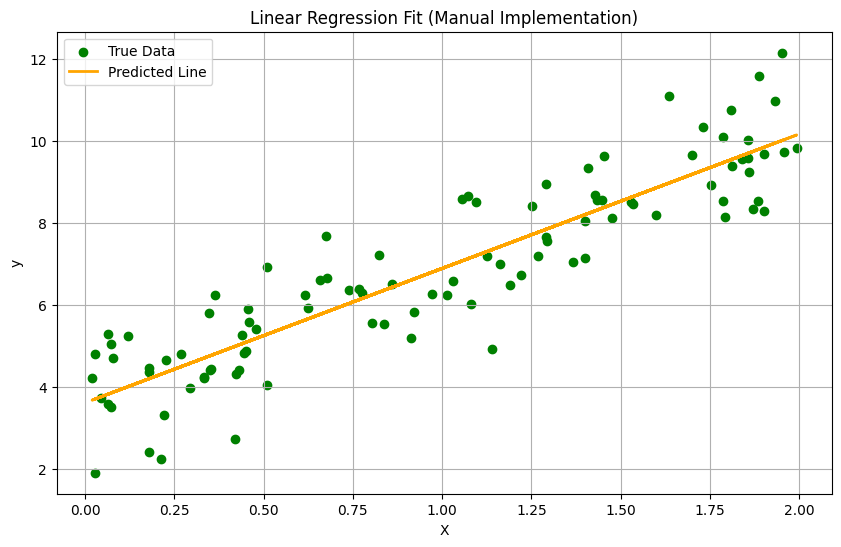

In [ ]:
y_pred_final = w * X + b

# Plot data and fitted line
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green', label='True Data')
plt.plot(X, y_pred_final, color='orange', linewidth=2, label='Predicted Line')
plt.title("Linear Regression Fit (Manual Implementation)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame({'sell_date': ['2020-05-30','2020-05-31','2020-05-30','2020-05-31' ], 'product': ['baseball', 'soccer','football','tennis']})
df

,sell_date,product
0,2020-05-30,baseball
1,2020-05-31,soccer
2,2020-05-30,football
3,2020-05-31,tennis


In [ ]:
df.groupby('sell_date').agg(
    num_sold = ('product','nunique'),
    products = ('product', lambda x:','.join(sorted(set(x))))

)


,num_sold,products
sell_date,,
2020-05-30,2,"baseball,football"
2020-05-31,2,"soccer,tennis"


In [ ]:
df.groupby('sell_date').agg(
    num_sold = ('product','nunique'),
    products = ('product', lambda x:','.join(sorted(set(x))))

).columns


Index(['num_sold', 'products'], dtype='object')

In [ ]:
df.groupby('sell_date').agg(
    num_sold = ('product','nunique'),
    products = ('product', lambda x:','.join(sorted(set(x))))

).index

Index(['2020-05-30', '2020-05-31'], dtype='object', name='sell_date')

In [ ]:
df.groupby('sell_date', as_index =False).agg(
    num_sold = ('product','nunique'),
    products = ('product', lambda x:','.join(sorted(set(x))))

)


,sell_date,num_sold,products
0,2020-05-30,2,"baseball,football"
1,2020-05-31,2,"soccer,tennis"


In [ ]:
df = pd.DataFrame({'player': [1, 1,2, 3,3], 'B': ['2016-03-01','2016-05-01','2016-04-01','2016-08-01','2016-03-01' ]})
df

,player,B
0,1,2016-03-01
1,1,2016-05-01
2,2,2016-04-01
3,3,2016-08-01
4,3,2016-03-01


In [ ]:
df[['player', 'B']].sort_values(by = ['player', 'B'])

,player,B
0,1,2016-03-01
1,1,2016-05-01
2,2,2016-04-01
4,3,2016-03-01
3,3,2016-08-01


In [ ]:
df['rank']= df[['player', 'B']].groupby('player')['B'].rank(method = 'dense')

In [ ]:
df

,player,B,rank
0,1,2016-03-01,1.0
1,1,2016-05-01,2.0
2,2,2016-04-01,1.0
3,3,2016-08-01,2.0
4,3,2016-03-01,1.0


In [ ]:
df[df['rank']==1][['player', 'B']]

,player,B
0,1,2016-03-01
2,2,2016-04-01
4,3,2016-03-01


In [ ]:
# Example input DataFrame
data = {
    'player_id': [1, 1, 1, 2, 2, 2, 3, 3],
    'event_date': ['2024-03-01', '2024-03-02', '2024-03-03',
                   '2024-03-05', '2024-03-06', '2024-03-08',
                   '2024-03-10', '2024-03-11']
}
df = pd.DataFrame(data)
df['event_date'] = pd.to_datetime(df['event_date'])

# Sort data
df = df.sort_values(['player_id', 'event_date'])

# For each row, calculate the day difference relative to a shifted row
df['diff'] = df.groupby('player_id')['event_date'].diff().dt.days

# Identify consecutive runs
# We'll mark where a new streak starts by cumulative sum of breaks in sequence
df['streak_group'] = (df['diff'] != 1).cumsum()

# Count streak length for each group and player
streak_counts = df.groupby(['player_id', 'streak_group']).size().reset_index(name='count')

# Filter players with a count >= 3
players_with_3_day_streak = streak_counts.query('count >= 3')['player_id'].unique()

print(players_with_3_day_streak)

[1]


In [ ]:
streak_counts

,player_id,streak_group,count
0,1,1,3
1,2,2,2
2,2,3,1
3,3,4,2


In [ ]:
df

,player_id,event_date,diff,streak_group
0,1,2024-03-01,NaN,1
1,1,2024-03-02,1.0,1
2,1,2024-03-03,1.0,1
3,2,2024-03-05,NaN,2
4,2,2024-03-06,1.0,2
5,2,2024-03-08,2.0,3
6,3,2024-03-10,NaN,4
7,3,2024-03-11,1.0,4


In [ ]:
(df['diff'] == 1).cumsum()

,diff
0,0
1,1
2,2
3,2
4,3
5,3
6,3
7,4


In [ ]:
(df['diff'] != 1)

,diff
0,True
1,False
2,False
3,True
4,False
5,True
6,True
7,False


In [ ]:
(df['diff'] != 1).cumsum()

,diff
0,1
1,1
2,1
3,2
4,2
5,3
6,4
7,4


In [ ]:
df['diff'] .cumsum()

,diff
0,NaN
1,1.0
2,2.0
3,NaN
4,3.0
5,5.0
6,NaN
7,6.0


In [ ]:
df.groupby(['player_id', 'streak_group']).size()

player_id  streak_group
1          1               3
2          2               2
           3               1
3          4               2
dtype: int64

In [ ]:
s = pd.Series([2, np.nan, 5, -1, 0])
s

,0
0,2.0
1,NaN
2,5.0
3,-1.0
4,0.0


In [ ]:
s[s>1]

,0
0,2.0
2,5.0


In [ ]:
s[s>1].cumsum()

,0
0,2.0
2,7.0


In [ ]:
streak_counts

,player_id,streak_group,count
0,1,1,3
1,2,2,2
2,2,3,1
3,3,4,2


In [ ]:
df

,player_id,event_date,diff,streak_group
0,1,2024-03-01,NaN,1
1,1,2024-03-02,1.0,1
2,1,2024-03-03,1.0,1
3,2,2024-03-05,NaN,2
4,2,2024-03-06,1.0,2
5,2,2024-03-08,2.0,3
6,3,2024-03-10,NaN,4
7,3,2024-03-11,1.0,4


In [ ]:
players_with_3_day_streak

array([1])

In [ ]:
df = pd.DataFrame({'ad_id': [1, 2, 3,5,1,2,3,1,2,1], 'user_id': [1,2,3,5,7,7,5,4,11,2], 'action':['Clicked','Clicked', 'Viewed', 'Ignored', 'Ignored', 'Viewed', 'Clicked', 'Viewed','Viewed', 'Clicked' ]})
df

,ad_id,user_id,action
0,1,1,Clicked
1,2,2,Clicked
2,3,3,Viewed
3,5,5,Ignored
4,1,7,Ignored
5,2,7,Viewed
6,3,5,Clicked
7,1,4,Viewed
8,2,11,Viewed
9,1,2,Clicked


In [ ]:
grouped_ads = df.groupby('ad_id')['action']
grouped_ads

In [ ]:
grouped_ads.value_counts()

ad_id  action 
1      Clicked    2
       Ignored    1
       Viewed     1
2      Viewed     2
       Clicked    1
3      Clicked    1
       Viewed     1
5      Ignored    1
Name: count, dtype: int64

In [ ]:
grouped_ads.value_counts().shape, grouped_ads.value_counts().index

((8,),
 MultiIndex([(1, 'Clicked'),
             (1, 'Ignored'),
             (1,  'Viewed'),
             (2,  'Viewed'),
             (2, 'Clicked'),
             (3, 'Clicked'),
             (3,  'Viewed'),
             (5, 'Ignored')],
            names=['ad_id', 'action']))

In [ ]:
tmpdf= grouped_ads.value_counts().reset_index()
tmpdf

,ad_id,action,count
0,1,Clicked,2
1,1,Ignored,1
2,1,Viewed,1
3,2,Viewed,2
4,2,Clicked,1
5,3,Clicked,1
6,3,Viewed,1
7,5,Ignored,1


In [ ]:
# Function to calculate the ratio of Value1 to Value2
def calculate_ratio(group):
  return group['Value1'].sum() / (group['Value2'].sum() + group['Value1'].sum())

In [ ]:
t = tmpdf.groupby('ad_id')[['action', 'count']]


In [ ]:
tmpdf.groupby('ad_id')[['action', 'count']].get_group(1)

In [ ]:
tmpdf.groupby('ad_id').transform(lambda x:x[x['action'] == 'Clicked']['count'] /x[x['action'] == 'Clicked']['count'])

KeyError: 'action'

In [ ]:
ctr = df.groupby('ad_id')['action'].apply(
        lambda x: round(
            (sum(x == 'Clicked') / (sum(x == 'Clicked') + sum(x == 'Viewed')) * 100) if (sum(x == 'Clicked') + sum(x == 'Viewed')) > 0 else 0.00,
            2
        )
    )

In [ ]:
ctr

,action
ad_id,
1,66.67
2,33.33
3,50.00
5,0.00


In [ ]:
type(df.groupby('ad_id')['action'])

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
df = pd.DataFrame([[100, 'Tom', 18,'DIAB1ABC'], [101, 'Scott', 28, 'ABC DIAB1 TEST'], [100, 'Tom', 28,'DIAB1ABC'], [103, 'Kate', 18,'DIAB1ABC'],[100, 'Tom', 30,'DIAB1ABC'] ,[102, 'Steve', 22, 'ABCDIAB1']], columns=['student_id', 'name', 'age','condition'])

In [ ]:
df

,student_id,name,age,condition
0,100,Tom,18,DIAB1ABC
1,101,Scott,28,ABC DIAB1 TEST
2,100,Tom,28,DIAB1ABC
3,103,Kate,18,DIAB1ABC
4,100,Tom,30,DIAB1ABC
5,102,Steve,22,ABCDIAB1


In [ ]:
((df['age'] >22) & (df['student_id'] >=101)).sum()

1

In [ ]:
df = pd.DataFrame({'num_legs': [2, 4, 5, 6],

                   'num_wings': [2, 0, 0, 0]},

                  index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,5,0
ant,6,0


In [ ]:
df2 = pd.DataFrame({'num_legs': [3, 5, 7, 6],

                   'num_wings': [2, 0, 0, 0]},

                  index=['falcon', 'dog', 'cat', 'ant'])
df2

,num_legs,num_wings
falcon,3,2
dog,5,0
cat,7,0
ant,6,0


In [ ]:
df3=pd.concat([df,df2])
df3

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,5,0
ant,6,0
falcon,3,2
dog,5,0
cat,7,0
ant,6,0


In [ ]:
df3['rank']=df3.groupby('num_wings')['num_legs'].rank(method='dense', ascending=False)
df3

,num_legs,num_wings,rank
falcon,2,2,2.0
dog,4,0,4.0
cat,5,0,3.0
ant,6,0,2.0
falcon,3,2,1.0
dog,5,0,3.0
cat,7,0,1.0
ant,6,0,2.0


In [ ]:
r = df3.groupby('num_wings')['num_legs'].rank(method='dense', ascending=False)
r

,num_legs
falcon,2.0
dog,4.0
cat,3.0
ant,2.0
falcon,1.0
dog,3.0
cat,1.0
ant,2.0


In [ ]:
df3[r==2]

,num_legs,num_wings,rank
falcon,2,2,2.0
ant,6,0,2.0
ant,6,0,2.0


In [ ]:
df.value_counts()

,,count
num_legs,num_wings,
4,0,2
2,2,1
6,0,1


In [ ]:
df.value_counts('num_legs')

,count
num_legs,
4,2
2,1
6,1


In [ ]:
df.value_counts('num_legs').reset_index()

,num_legs,count
0,4,2
1,2,1
2,6,1


In [ ]:
df[df['age']>=20]['name'].drop_duplicates().shape[0]

3

In [ ]:
df[df['age']>=20]

,student_id,name,age,condition
1,101,Scott,28,ABC DIAB1 TEST
2,100,Tom,28,DIAB1ABC
4,100,Tom,30,DIAB1ABC
5,102,Steve,22,ABCDIAB1


In [ ]:
df[df['age'] >= 20].value_counts('name')

,count
name,
Tom,2
Scott,1
Steve,1


In [ ]:
df[df['age']>20]['name'].nunique()

3

In [ ]:
df[['student_id', 'age']].sum()

,0
student_id,303
age,68


In [ ]:
f'{33/100:.3f}'

'0.330'

In [ ]:
round(33/100, 3)

0.33

In [ ]:
'%.2f'%(10/3)

'3.33'

In [ ]:
df['rank_age'] = df['age'].rank(method = 'dense', ascending = False)
df

,student_id,name,age,condition,rank_age
0,100,Tom,18,DIAB1ABC,3.0
1,101,Scott,28,ABC DIAB1 TEST,1.0
2,102,Steve,22,ABCDIAB1,2.0


In [ ]:
data = {'Category': ['A', 'A', 'B', 'B', 'A', 'C'],
        'Value': [10, 15, 12, 20, 18, 25],
        'Other_Value': [1, None, 3, 4, None, 6]}
df = pd.DataFrame(data)
df

,Category,Value,Other_Value
0,A,10,1.0
1,A,15,NaN
2,B,12,3.0
3,B,20,4.0
4,A,18,NaN
5,C,25,6.0


In [ ]:
if df[df['Value'] > 35].empty:
  print('Yes!')

Yes!


In [ ]:
df.groupby('Category')['Value'].sum()

,Value
Category,
A,43
B,32
C,25


In [ ]:
t = df.groupby('Category')['Value'].sum().to_frame()
t

,Value
Category,
A,43
B,32
C,25


In [ ]:
t.index, t.columns, t.shape

(Index(['A', 'B', 'C'], dtype='object', name='Category'),
 Index(['Value'], dtype='object'),
 (3, 1))

In [ ]:
df.groupby('Category')['Value'].sum().to_frame().reset_index()

,Category,Value
0,A,43
1,B,32
2,C,25


In [ ]:
df.groupby('Category')['Value', 'Other_Value'].sum().reset_index()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
df.groupby('Category')[['Value', 'Other_Value']].sum().reset_index()

,Category,Value,Other_Value
0,A,43,1.0
1,B,32,7.0
2,C,25,6.0


In [ ]:
df['Value', 'Other_Value']

KeyError: ('Value', 'Other_Value')

In [ ]:
df.groupby('Category')['Value'].sum().to_frame('sum_of_values').reset_index()

,Category,sum_of_values
0,A,43
1,B,32
2,C,25


In [ ]:
df.groupby('Category')['Value'].sum().to_frame('sum_of_values')

,sum_of_values
Category,
A,43
B,32
C,25


In [ ]:
df.groupby('Category')['Value'].sum().to_frame('sum_of_values').columns



Index(['sum_of_values'], dtype='object')

In [ ]:
df.groupby('Category')['Value'].sum().to_frame('sum_of_values').reset_index()

,Category,sum_of_values
0,A,43
1,B,32
2,C,25


In [ ]:
df

,Category,Value,Other_Value
0,A,10,1.0
1,A,15,NaN
2,B,12,3.0
3,B,20,4.0
4,A,18,NaN
5,C,25,6.0


In [ ]:
df.groupby('Category').agg('sum')

,Value,Other_Value
Category,,
A,43,1.0
B,32,7.0
C,25,6.0


In [ ]:
df.groupby('Category').agg('sum').reset_index()

,Category,Value,Other_Value
0,A,43,1.0
1,B,32,7.0
2,C,25,6.0


In [ ]:
df2 = df.groupby('Category').agg({'Value':'sum'})
df2


,Value
Category,
A,43
B,32
C,25


In [ ]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
result3 = df.agg('mean') # Returns a Series
print(result3)
print(type(result3))

   A  B
0  1  4
1  2  5
2  3  6
A    2.0
B    5.0
dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
result4 = df.agg(['mean', 'sum']) # Returns a DataFrame
print(result4)
print(type(result4))

        A     B
mean  2.0   5.0
sum   6.0  15.0
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df2.index, df2.columns, df2.shape

(Index(['A', 'B', 'C'], dtype='object', name='Category'),
 Index(['Value'], dtype='object'),
 (3, 1))

In [ ]:
df.groupby('Category').agg({'Value':"sum"}).to_frame('sum_of_values').reset_index()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [ ]:
df.groupby('Category').sum()

,Value,Other_Value
Category,,
A,43,1.0
B,32,7.0
C,25,6.0


In [ ]:
df.groupby('Category').sum().reset_index()

,Category,Value,Other_Value
0,A,43,1.0
1,B,32,7.0
2,C,25,6.0


In [ ]:
df.groupby('Category').sum().to_frame().reset_index()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [ ]:
series = pd.Series([10, 20, 30])
series

,0
0,10
1,20
2,30


In [ ]:
series = pd.Series([10, 20, 30], name='counts')
series


,counts
0,10
1,20
2,30


In [ ]:
series.index, series.values, series.name

(RangeIndex(start=0, stop=3, step=1), array([10, 20, 30]), None)

In [ ]:
df_from_series = series.to_frame('new_counts')
df_from_series

,new_counts
0,10
1,20
2,30


In [ ]:
type(df['age'].rank(method = 'dense', ascending = False))

pandas.core.series.Series

In [ ]:
len(df[df['rank_age'] ==5]['name'])

0

In [ ]:
df[df.name=='Jeff']

,student_id,name,age,condition,rank_age


In [ ]:
pd.DataFrame({'name':['jeff'], 'age':[25]})

,name,age
0,jeff,25


In [ ]:
pd.DataFrame({'name':['jack', 'jeff'], 'age':[25,45]})

,name,age
0,jack,25
1,jeff,45


In [ ]:
N=10
ans = pd.DataFrame({f'getNthHighESTsalary{N}': None})
ans

ValueError: If using all scalar values, you must pass an index

In [ ]:
df.sort_values(by = 'rank_age')

,student_id,name,age,condition,rank_age
1,101,Scott,28,ABC DIAB1 TEST,1.0
2,102,Steve,22,ABCDIAB1,2.0
0,100,Tom,18,DIAB1ABC,3.0


In [ ]:
df.sort_values(by = 'rank_age').iloc[0][['age']]

,1
age,28


In [ ]:
N=18
print(f'get {N} age')

get 18 age


In [ ]:
len(df)

3

In [ ]:
df.sort_values(by = 'rank_age').iloc[10]['age']

IndexError: single positional indexer is out-of-bounds

In [ ]:
df.sort_values(by = 'rank_age').loc[1, 'age']

28

In [ ]:
df.sort_values(by = 'rank_age').iloc[0, 'age']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
df.dtypes

,0
student_id,int64
name,object
age,int64
condition,object
rank_age,float64


In [ ]:
3.0==3

True

In [ ]:
df[df.rank_age == 2]['name']

,name
2,Steve


In [ ]:
df[df['condition'].str.match(r'.*DIAB1.*')]

,student_id,name,age,condition
0,100,Tom,18,DIAB1ABC
1,101,Scott,28,ABC DIAB1 TEST
2,102,Steve,22,ABCDIAB1


In [ ]:
df[df['condition'].str.match(r'.*(^|\s)DIAB1.*')]

,student_id,name,age,condition
0,100,Tom,18,DIAB1ABC
1,101,Scott,28,ABC DIAB1 TEST


In [ ]:
df['match'] = df['condition'].str.match(r'.*(^|\s)DIAB1.*')
df

,student_id,name,age,condition,match
0,100,Tom,18,DIAB1ABC,True
1,101,Scott,28,ABC DIAB1 TEST,True
2,102,Steve,22,ABCDIAB1,False


In [ ]:
df.match.sum()

2

In [ ]:
df[df['condition'].str.contains(r'(^|\s)DIAB1')]

<ipython-input-3-168b560726bb>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['condition'].str.contains(r'(^|\s)DIAB1')]


,student_id,name,age,condition
0,100,Tom,18,DIAB1ABC
1,101,Scott,28,ABC DIAB1 TEST


In [ ]:
df[df['condition'].str.extract(r'(^|\s)DIAB1')]

,student_id,name,age,condition
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [ ]:
s = pd.Series(['$', 'B', 'Aab$', '$$ca', 'C$B$', 'cat'])
s

,0
0,$
1,B
2,Aab$
3,$$ca
4,C$B$
5,cat


In [ ]:
df['new_col'] = df['name'].str.count('o')
df

,student_id,name,age,condition,new_col
0,100,Tom,18,DIAB1ABC,1
1,101,Scott,28,ABC DIAB1 TEST,1
2,102,Steve,22,ABCDIAB1,0


In [ ]:
s.str.count('\\$')

,0
0,1
1,0
2,1
3,2
4,2
5,0


In [ ]:
df['grade'] = df.apply(lambda df:df.age*2 if (df['name'].str.startswith('S')) & (df.student_id %2) else 0, axis=1 )
df

AttributeError: 'str' object has no attribute 'str'

In [ ]:
(df['name'].str.startswith('S')) & (df.student_id %2)

,0
0,False
1,True
2,False


In [ ]:
df.loc[0,'name']

'Tom'

In [ ]:
df.loc[0]['name']

'Tom'

In [ ]:
df.loc[0]

,0
student_id,100
name,Tom
age,18


In [ ]:
df.loc[0].str.startswith('S')

,0
student_id,NaN
name,False
age,NaN


In [ ]:
df.loc[0,'name'].str.startswith('S')

AttributeError: 'str' object has no attribute 'str'

In [ ]:
df2 = pd.DataFrame([[100, 'A'], [101, 'A']], columns=['id', 'grade'])
df2

,id,grade
0,100,A
1,101,A


In [ ]:
df['student_id'].isin(df2['id'])

,student_id
0,True
1,True
2,False


In [ ]:
(df.student_id >101) | (df.age >25)

,0
0,False
1,True
2,True


In [ ]:
type((df.student_id >101) | (df.age >25))

pandas.core.series.Series

In [ ]:
[(df.student_id >101) | (df.age >25)]

[0    False
 1     True
 2     True
 dtype: bool]

In [ ]:
df[(df.student_id >101) | (df.age >25)]

,student_id,name,age
1,101,Brody,28
2,102,Steve,22


In [ ]:
df[[(df.student_id >101) | (df.age >25)]]

KeyError: "None of [Index([(False, True, True)], dtype='object')] are in the [columns]"

In [ ]:
df.melt()

,variable,value
0,student_id,100
1,student_id,101
2,student_id,102
3,name,Tom
4,name,Brody
5,name,Steve
6,age,28
7,age,18
8,age,22


In [ ]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},

                   'B': {0: 1, 1: 3, 2: 5},

                   'C': {0: 2, 1: 4, 2: 6}
                   })

In [ ]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [ ]:
test_pd = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

In [ ]:
pd.melt(df, id_vars=['A'])


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [ ]:
test_pd

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [ ]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [ ]:
test_pd.pivot(index = 'A', columns='variable', values='value')

variable,B,C
A,,
a,1,2
b,3,4
c,5,6


In [ ]:
df2 = pd.DataFrame([[100, 'Tommy', 28], [102, 'Brandon', 18], [102, 'Steve', 22]], columns=['student_id', 'name', 'age'])
df2

,student_id,name,age
0,100,Tommy,28
1,102,Brandon,18
2,102,Steve,22


In [ ]:
pd.concat([df, df2], ignore_index = True)

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22
3,100,Tommy,28
4,102,Brandon,18
5,102,Steve,22


In [ ]:
pd.concat([df, df2], ignore_index = True).drop_duplicates()

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22
3,100,Tommy,28
4,102,Brandon,18


In [ ]:
pd.concat([df, df2], ignore_index = True).drop_duplicates(subset = ['age'], keep = 'last')

,student_id,name,age
3,100,Tommy,28
4,102,Brandon,18
5,102,Steve,22


In [ ]:
df3 = pd.DataFrame([[100, 'Tommy', 28], [102, 'Brandon', 18], [102, 'Steve', 22]], columns=['student', 'name', 'age'])
df3

,student,name,age
0,100,Tommy,28
1,102,Brandon,18
2,102,Steve,22


In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
pd.concat([df, df3])

,student_id,name,age,student
0,100.0,Tom,28,NaN
1,101.0,Brody,18,NaN
2,102.0,Steve,22,NaN
0,NaN,Tommy,28,100.0
1,NaN,Brandon,18,102.0
2,NaN,Steve,22,102.0


In [ ]:
df3 = pd.DataFrame([100], index = ['a'])

In [ ]:
df4 = pd.DataFrame([100], index=['a'])
df4

,0
a,100


In [ ]:
pd.concat([df3, df4], ignore_index = True)

,0
0,100
1,100


In [ ]:
pd.concat([df3, df4], verify_integrity= True)

ValueError: Indexes have overlapping values: Index(['a'], dtype='object')

In [ ]:
pd.concat([df,df2])

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22
0,100,Tommy,28
1,102,Brandon,18
2,102,Steve,22


In [ ]:
pd.concat([df,df2], ignore_index = True)

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22
3,100,Tommy,28
4,102,Brandon,18
5,102,Steve,22


In [ ]:
df,df2

(   student_id   name  age
 0         100    Tom   28
 1         101  Brody   18
 2         102  Steve   22,
    student_id     name  age
 0         100    Tommy   28
 1         102  Brandon   18
 2         102    Steve   22)

In [ ]:
pd.concat([df, df2], axis = 1)

,student_id,name,age,student_id,name,age
0,100,Tom,28,100,Tommy,28
1,101,Brody,18,102,Brandon,18
2,102,Steve,22,102,Steve,22


In [ ]:
df[df['student_id'] == 100][['name', 'age']]

,name,age
0,Tom,28


In [ ]:
df[df['student_id'] == 100, ['name', 'age']]

InvalidIndexError: (0     True
1    False
2    False
Name: student_id, dtype: bool, ['name', 'age'])

In [ ]:
df.loc[df['student_id'] == 100, ['name', 'age']]

,name,age
0,Tom,28


In [ ]:
df.loc[df['student_id'] == 100]

,student_id,name,age
0,100,Tom,28


In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[[0,1]]

,student_id,name,age
0,100,Tom,28
1,101,Brody,18


In [ ]:
df.loc[0,1]

KeyError: 1

In [ ]:
df.loc[0:1]

,student_id,name,age
0,100,Tom,28
1,101,Brody,18


In [ ]:
df.loc[df['student_id'] == 100]

,student_id,name,age
0,100,Tom,28


In [ ]:
df['student_id'] == 100

,student_id
0,True
1,False
2,False


In [ ]:
type(df['student_id'] ==100





     )

pandas.core.series.Series

In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[df['student_id']>100]

,student_id,name,age
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[[0]]

,student_id,name,age
0,100,Tom,28


In [ ]:
df.loc[0]

,0
student_id,100
name,Tom
age,28


In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[0, 'name','age']

IndexingError: Too many indexers

In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[[0,1], ['name', 'age']]

,name,age
0,Tom,28
1,Brody,18


In [ ]:
df.loc[0:1, ['name', 'age']]

,name,age
0,Tom,28
1,Brody,18


In [ ]:
df.loc[0, ['name','age']]

,0
name,Tom
age,28


In [ ]:
df.loc[df.student_id == 100, ['name', 'age']]

pandas.core.frame.DataFrame

In [ ]:
df.student_id == 100

,student_id
0,True
1,False
2,False


In [ ]:
pd.Series([False, True, False],    index=['viper', 'sidewinder', 'cobra'])

,0
viper,False
sidewinder,True
cobra,False


In [ ]:
pd.Index(['a','b'], name = 'c')

Index(['a', 'b'], dtype='object', name='c')

In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[pd.Index([0,1], name = 'number')]

,student_id,name,age
number,,,
0,100,Tom,28
1,101,Brody,18


In [ ]:
df.loc[[0,1], ['name', 'age']]

,name,age
0,Tom,28
1,Brody,18


In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,18
2,102,Steve,22


In [ ]:
df.loc[[1,0,2]]

,student_id,name,age
1,101,Brody,100
0,100,Tom,28
2,102,Steve,100


In [ ]:
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,100
2,102,Steve,100


In [ ]:
df.loc[:] += df.loc[[1,0,2]]

In [ ]:
df

,student_id,name,age
0,200,TomTom,56
1,202,BrodyBrody,200
2,204,SteveSteve,200


In [ ]:
df['new_col'] = df['age'] + 100
df

,student_id,name,age,new_col
0,200,TomTom,56,156
1,202,BrodyBrody,200,300
2,204,SteveSteve,200,300


In [ ]:
df.loc[df['student_id']>100, 'age'] =100
df

,student_id,name,age
0,100,Tom,28
1,101,Brody,100
2,102,Steve,100


In [ ]:
df.loc[[0, ['name', 'age']]]

TypeError: unhashable type: 'list'

In [ ]:
df['student_id'] == 100

In [ ]:
df.loc['age']

KeyError: 'age'

In [ ]:
df[df['student_id'] == 100]

,student_id,name,age
0,100,Tom,28


In [ ]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1 removes period from column name Eq.
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2 sets the type of Party column to category
     .pipe(int64_to_uint8)  # 3 converts all the int64 columns to unsigned 8-bit columns
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4 creates am average_rank column
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )

In [ ]:
pres = tweak_siena_pres(df)

## 22.1 Missing Data

In [ ]:
pres.isna()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
pres[pres.Integrity.isna()]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile


- Sum the results to get the counts of columns with missing values

In [ ]:
pres.isna().sum()

Seq                               0
President                         0
Party                             0
Background                        0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
Average_rank                      0
Quartile                          0
dtype: int64

- Take the mean to get the fraction missing

In [ ]:
pres.isna().mean()

Seq                               0.0
President                         0.0
Party                             0.0
Background                        0.0
Imagination                       0.0
Integrity                         0.0
Intelligence                      0.0
Luck                              0.0
Willing_to_take_risks             0.0
Ability_to_compromise             0.0
Executive_ability                 0.0
Leadership_ability                0.0
Communication_ability             0.0
Overall_ability                   0.0
Party_leadership                  0.0
Relations_with_Congress           0.0
Court_appointments                0.0
Handling_of_economy               0.0
Executive_appointments            0.0
Domestic_accomplishments          0.0
Foreign_policy_accomplishments    0.0
Avoid_crucial_mistakes            0.0
Experts'_view                     0.0
Overall                           0.0
Average_rank                      0.0
Quartile                          0.0
dtype: float

## 22.2 Duplicates

In [ ]:
pres.head()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st


In [ ]:
pres.drop_duplicates()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th


- If we wanted to keep only the first president from each party

In [ ]:
pres.drop_duplicates(subset='Party')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st


- Use ``keep`` parameter to specify which to keep

In [ ]:
# keep the last value
pres.drop_duplicates(subset='Party', keep='last')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,39,37,37,37,37,33,37,38,39,4th
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,14,10,13,13,20,10,11,17,17,2nd
44,45,Donald Trump,Republican,43,40,44,44,10,25,42,...,40,39,44,40,42,41,42,42,42,4th


In [ ]:
# drop all duplicates
# If value is duplicated, drop it all
pres.drop_duplicates(subset='Party', keep=False)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd


- To drop duplicates if only the previous is a duplicate (rather than any row)
- We create a column that indicates whether it is the same as the next value
- This indicates whether it is the first entry in a sequence

In [ ]:
(pres
.assign(first_in_party_seq=lambda df_:df_.Party != df_.Party.shift(1))
.loc[lambda df_:df_.first_in_party_seq])

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile,first_in_party_seq
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,2,2,1,2,1,1,1st,True
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,13,15,19,13,16,10,14,13,2nd,True
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,20,4,6,9,7,5,5,5,1st,True
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,25,25,17,23,20,19,19,19,2nd,True
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,41,40,42,44,37,39,39,38,4th,True
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,34,36,36,26,32,36,37,37,4th,True
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,15,16,12,8,8,13,12,11,1st,True
12,12,Zachary Taylor,Whig,30,26,22,32,37,24,26,...,27,33,27,30,26,30,30,30,3rd,True
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,40,39,41,39,38,40,40,41,4th,True
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,4,2,1,6,2,1,3,3,1st,True
